In [1]:
# ####%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from scipy.stats import sem


### QB players Data  1989 - 2019 ###

In [3]:
# reading QB players data file
qb_file = "Data/NFLQBDATA_Mod.csv"
nfl_data_df = pd.read_csv(qb_file)
#  preview dataframe
nfl_data_df.head()

,Rk,Player,From,To,No. of Season,Tm,Lg,G,GS,Cmp,...,Yds.1,Y/A,AY/A,ANY/A,Y/G,W,L,T,4QC,GWD
0,1,Peyton Manning,1998,2015,18,TOT,NFL,266.0,265.0,6125,...,1953,7.67,7.61,7.17,270.5,186.0,79.0,0.0,43.0,54.0
1,2,Tom Brady,2000,2019,20,NWE,NFL,273.0,271.0,6094,...,2960,7.52,7.81,7.14,262.2,211.0,60.0,0.0,35.0,44.0
2,3,Drew Brees,2001,2019,19,TOT,NFL,266.0,265.0,6621,...,2821,7.61,7.60,7.03,281.4,156.0,109.0,0.0,35.0,49.0
3,4,Brett Favre*,1991,2010,20,TOT,NFL,302.0,298.0,6300,...,3487,7.06,6.58,5.93,237.9,186.0,112.0,0.0,28.0,43.0
4,5,Philip Rivers,2004,2019,16,SDG,NFL,216.0,212.0,4619,...,2552,7.82,7.76,6.99,258.8,120.0,92.0,0.0,26.0,31.0


In [4]:
retired_qb =nfl_data_df[nfl_data_df['To']!=2019]
retired_qb.head()

,Rk,Player,From,To,No. of Season,Tm,Lg,G,GS,Cmp,...,Yds.1,Y/A,AY/A,ANY/A,Y/G,W,L,T,4QC,GWD
0,1,Peyton Manning,1998,2015,18,TOT,NFL,266.0,265.0,6125,...,1953,7.67,7.61,7.17,270.5,186.0,79.0,0.0,43.0,54.0
3,4,Brett Favre*,1991,2010,20,TOT,NFL,302.0,298.0,6300,...,3487,7.06,6.58,5.93,237.9,186.0,112.0,0.0,28.0,43.0
9,10,Carson Palmer,2004,2017,14,TOT,NFL,182.0,181.0,3941,...,2364,7.33,6.93,6.22,254.1,92.0,88.0,1.0,22.0,35.0
10,11,Vinny Testaverde,1989,2007,19,TOT,NFL,212.0,195.0,3494,...,2560,6.90,6.08,5.33,197.7,85.0,109.0,1.0,27.0,30.0
11,12,Drew Bledsoe,1993,2006,14,TOT,NFL,194.0,193.0,3839,...,3135,6.64,6.01,5.18,230.0,98.0,95.0,0.0,24.0,31.0


In [73]:
# finding staderd deviation of QB players
std_value_qb = round(retired_qb['No. of Season'].std(),2)

print(f'Standard deviation of no. of seasons for QB(s): {std_value_qb}')

Standard deviation of no. of seasons for QB(s): 4.43


In [77]:
# finding mean value of QB players

mean_qb_value = retired_qb['No. of Season'].mean()

print(f'Mean value of no. of seasons for QB(s): {mean_qb_value}')

Mean value of no. of seasons for QB(s): 5.784653465346534


In [78]:
# finding median value of QB players

median_qb_value = retired_qb['No. of Season'].median()

print(f'Median value of no. of seasons for QB(s): {median_qb_value}')

Median value of no. of seasons for QB(s): 5.0


In [79]:
# Use numpy to create quartiles
qb_q1 = np.percentile(retired_qb['No. of Season'], 25)
qb_q3 = np.percentile(retired_qb['No. of Season'],75)

# Put down more informative message
print(f"25th Percentile: {qb_q1}")
print(f"75th Percentile: {qb_q3}")

25th Percentile: 2.0
75th Percentile: 9.0


In [80]:
# Calculate the interquartile range
iqr = (qb_q3 - qb_q1)
print(f"Interquartile range for QB players: {iqr}")

Interquartile range for QB players: 7.0


In [81]:
# Find lower boundary
lower_boundary = qb_q1 - (1.5 * iqr)
print(f"Lower Boundary for Qb players: {lower_boundary}")

Lower Boundary for Qb players: -8.5


In [82]:
# Find upper boundary
# Q3 + 1.5 * IQR
upper_boundary = qb_q3 + (1.5 * iqr)
print(f"Upper Boundary for Qb players: {upper_boundary}")

Upper Boundary for Qb players: 19.5


In [83]:
# Check for any lower outliers
qb_arr = retired_qb['No. of Season']
qb_arr[qb_arr<=lower_boundary]


Series([], Name: No. of Season, dtype: int64)

In [84]:
# Check for any upper outliers
qb_arr[qb_arr >= upper_boundary]

3    20
Name: No. of Season, dtype: int64

In [85]:
all_players =nfl_data_df[nfl_data_df['To']==2019]
all_players
current_qb = all_players[all_players['Yds'] >= 10000]
current_qb.head()


,Rk,Player,From,To,No. of Season,Tm,Lg,G,GS,Cmp,...,Yds.1,Y/A,AY/A,ANY/A,Y/G,W,L,T,4QC,GWD
1,2,Tom Brady,2000,2019,20,NWE,NFL,273.0,271.0,6094,...,2960,7.52,7.81,7.14,262.2,211.0,60.0,0.0,35.0,44.0
2,3,Drew Brees,2001,2019,19,TOT,NFL,266.0,265.0,6621,...,2821,7.61,7.60,7.03,281.4,156.0,109.0,0.0,35.0,49.0
4,5,Philip Rivers,2004,2019,16,SDG,NFL,216.0,212.0,4619,...,2552,7.82,7.76,6.99,258.8,120.0,92.0,0.0,26.0,31.0
5,6,Ben Roethlisberger,2004,2019,16,PIT,NFL,218.0,216.0,4651,...,3320,7.82,7.64,6.71,259.4,144.0,71.0,1.0,31.0,42.0
6,7,Eli Manning,2004,2019,16,NYG,NFL,234.0,232.0,4860,...,2839,7.01,6.57,5.91,241.6,116.0,116.0,0.0,27.0,37.0


In [86]:
hof_qb = nfl_data_df[nfl_data_df['Player'].str.contains('\*')]
hof_qb


,Rk,Player,From,To,No. of Season,Tm,Lg,G,GS,Cmp,...,Yds.1,Y/A,AY/A,ANY/A,Y/G,W,L,T,4QC,GWD
3,4,Brett Favre*,1991,2010,20,TOT,NFL,302.0,298.0,6300,...,3487,7.06,6.58,5.93,237.9,186.0,112.0,0.0,28.0,43.0
16,17,Dan Marino*,1989,1999,11,MIA,NFL,155.0,155.0,3101,...,1346,7.13,6.71,6.22,242.0,93.0,62.0,0.0,23.0,31.0
18,19,Warren Moon*,1989,2000,12,TOT,NFL,140.0,135.0,2929,...,2028,7.15,6.66,5.89,247.5,76.0,59.0,0.0,18.0,26.0
21,22,Kurt Warner*,1998,2009,12,TOT,NFL,124.0,116.0,2666,...,1669,7.95,7.55,6.71,260.8,67.0,49.0,0.0,7.0,11.0
22,23,Steve Young*,1989,1999,11,SFO,NFL,131.0,118.0,2309,...,1471,8.24,8.36,7.36,218.8,87.0,31.0,0.0,11.0,14.0
24,25,John Elway*,1989,1998,10,DEN,NFL,149.0,148.0,2681,...,2494,7.25,6.84,5.86,223.7,94.0,54.0,0.0,17.0,27.0
30,31,Jim Kelly*,1989,1996,8,BUF,NFL,116.0,116.0,2070,...,1629,7.50,6.85,5.98,221.5,79.0,37.0,0.0,16.0,21.0
36,37,Troy Aikman*,1989,2000,12,DAL,NFL,165.0,165.0,2898,...,1748,6.99,6.34,5.66,199.6,94.0,71.0,0.0,15.0,20.0
80,81,Joe Montana*,1989,1994,6,TOT,NFL,54.0,53.0,1087,...,552,7.58,7.50,6.80,241.1,42.0,11.0,0.0,10.0,13.0


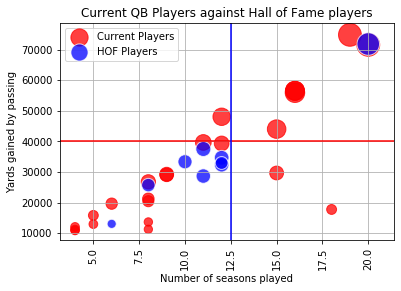

In [141]:
#plot a scatter plot
plt.scatter(current_qb['No. of Season'],current_qb['Yds'],s = current_qb['TD'],marker='o',facecolors= 'red',alpha=0.75, label = 'Current Players')
plt.scatter(hof_qb['No. of Season'],hof_qb['Yds'],s = hof_qb['TD'],marker='o',facecolors= 'blue',edgecolors="white",alpha=0.75, label = 'HOF Players')

plt.xticks(rotation="vertical")
#add v and h lines 
plt.axhline(y=40000, color='r', linestyle='-')
plt.axvline(x=12.5, color='b', linestyle='-')
plt.legend(loc='best')
#add title and labels
plt.title("Current QB Players against Hall of Fame players")
plt.xlabel("Number of seasons played")
plt.ylabel("Yards gained by passing")
plt.grid()
# Save the Figure
plt.savefig("Images/qb_scatterplot.png")
plt.show()


### Running Back players Data  1989 - 2019###

In [88]:
#  reading running back players data
rb_file = "Data/NFLRBDATA_Mod.csv"
rb_data_df = pd.read_csv(rb_file)
#  preview Dataframe
rb_data_df.head()

,Rk,Player,From,To,No of Season,Tm,Lg,G,GS,Att,Yds,Y/A,TD,Y/G
0,1,Emmitt Smith*,1990,2004,15,TOT,NFL,226.0,219.0,4409,18355,4.16,164,81.2
1,2,Barry Sanders*,1989,1998,10,DET,NFL,153.0,151.0,3062,15269,4.99,99,99.8
2,3,Frank Gore,2005,2019,15,TOT,NFL,214.0,199.0,3443,15021,4.36,79,70.2
3,4,Curtis Martin*,1995,2005,11,TOT,NFL,168.0,166.0,3518,14101,4.01,90,83.9
4,5,LaDainian Tomlinson*,2001,2011,11,TOT,NFL,170.0,155.0,3174,13684,4.31,145,80.5


In [89]:
#  dropping currunt players from dataframe column
retired_rb =rb_data_df[rb_data_df['To']!=2019]
retired_rb.head()

,Rk,Player,From,To,No of Season,Tm,Lg,G,GS,Att,Yds,Y/A,TD,Y/G
0,1,Emmitt Smith*,1990,2004,15,TOT,NFL,226.0,219.0,4409,18355,4.16,164,81.2
1,2,Barry Sanders*,1989,1998,10,DET,NFL,153.0,151.0,3062,15269,4.99,99,99.8
3,4,Curtis Martin*,1995,2005,11,TOT,NFL,168.0,166.0,3518,14101,4.01,90,83.9
4,5,LaDainian Tomlinson*,2001,2011,11,TOT,NFL,170.0,155.0,3174,13684,4.31,145,80.5
5,6,Jerome Bettis*,1993,2005,13,TOT,NFL,192.0,153.0,3479,13662,3.93,91,71.2


In [90]:
# finding staderd deviation of running back players
std_rb_value = retired_rb['No of Season'].std()

print(f'Standard deviation of no. of seasons for RB(s): {std_rb_value}')

Standard deviation of no. of seasons for RB(s): 3.118859866135235


In [91]:
# finding mean of running back players
mean_rb_value = retired_rb['No of Season'].mean()

print(f'Mean Value of no. of seasons for RB(s): {mean_rb_value}')

Mean Value of no. of seasons for RB(s): 4.210815047021944


In [92]:
# finding median of running back players
median_rb_value = retired_rb['No of Season'].median()

print(f'Median Value of no. of seasons for RB(s): {median_rb_value}')

Median Value of no. of seasons for RB(s): 3.0


In [93]:
# Use numpy to create quartiles
rb_q1 = np.percentile(retired_rb['No of Season'], 25)
rb_q3 = np.percentile(retired_rb['No of Season'],75)
print(f"25th Percentile: {rb_q1}")
print(f"75th Percentile: {rb_q3}")

25th Percentile: 2.0
75th Percentile: 6.0


In [94]:
# Calculate the interquartile range
rb_iqr = (rb_q3 - rb_q1)
print(f"Interquartile range for RB players: {rb_iqr}")

Interquartile range for RB players: 4.0


In [95]:
# Find lower boundary
rb_lower_boundary = rb_q1 - (1.5 * rb_iqr)
print(f"Lower Boundary for RB players: {rb_lower_boundary}")

Lower Boundary for RB players: -4.0


In [96]:
# Find upper boundary
rb_upper_boundary = rb_q3 + (1.5 * rb_iqr)
print(f"Upper Boundary for RB players: {rb_upper_boundary}")

Upper Boundary for RB players: 12.0


In [97]:
# Check for any upper outliers
rb_arr = retired_rb['No of Season']
rb_arr[rb_arr>= rb_upper_boundary]

0       15
5       13
7       12
9       13
10      12
12      12
13      12
17      12
20      12
21      13
26      12
33      12
123     13
146     12
184     14
199     14
221     14
242     16
244     13
300     12
301     16
375     14
405     16
450     12
517     12
538     12
582     12
711     14
721     13
946     13
989     13
1274    14
1319    14
Name: No of Season, dtype: int64

In [98]:
# Check for any lower outliers
rb_arr[rb_arr<= rb_lower_boundary]

Series([], Name: No of Season, dtype: int64)

In [99]:
#create a new df with only current players
all_rb= rb_data_df[rb_data_df['To']==2019]
all_rb.count()
#extract data of current players who have gained more than 1000 yds by passing
current_rb= all_rb[all_rb['Yds']>1000]
current_rb.head()

,Rk,Player,From,To,No of Season,Tm,Lg,G,GS,Att,Yds,Y/A,TD,Y/G
2,3,Frank Gore,2005,2019,15,TOT,NFL,214.0,199.0,3443,15021,4.36,79,70.2
6,7,Adrian Peterson,2007,2019,13,TOT,NFL,152.0,142.0,2858,13408,4.69,107,88.2
14,15,LeSean McCoy,2009,2019,11,TOT,NFL,151.0,134.0,2386,10820,4.53,71,71.7
45,46,Mark Ingram,2011,2019,9,TOT,NFL,110.0,68.0,1376,6335,4.60,55,57.6
61,62,Le'Veon Bell,2013,2019,7,TOT,NFL,65.0,65.0,1285,5499,4.28,35,84.6


In [100]:
#find the rows with * in the player name 
hof_rb = rb_data_df[rb_data_df['Player'].str.contains('\*')]
hof_rb

,Rk,Player,From,To,No of Season,Tm,Lg,G,GS,Att,Yds,Y/A,TD,Y/G
0,1,Emmitt Smith*,1990,2004,15,TOT,NFL,226.0,219.0,4409,18355,4.16,164,81.2
1,2,Barry Sanders*,1989,1998,10,DET,NFL,153.0,151.0,3062,15269,4.99,99,99.8
3,4,Curtis Martin*,1995,2005,11,TOT,NFL,168.0,166.0,3518,14101,4.01,90,83.9
4,5,LaDainian Tomlinson*,2001,2011,11,TOT,NFL,170.0,155.0,3174,13684,4.31,145,80.5
5,6,Jerome Bettis*,1993,2005,13,TOT,NFL,192.0,153.0,3479,13662,3.93,91,71.2
7,8,Marshall Faulk*,1994,2005,12,TOT,NFL,176.0,156.0,2836,12279,4.33,100,69.8
12,13,Thurman Thomas*,1989,2000,12,TOT,NFL,167.0,145.0,2670,11193,4.19,63,67.0
35,36,Terrell Davis*,1995,2001,7,DEN,NFL,78.0,77.0,1655,7607,4.60,60,97.5
68,69,Marcus Allen*,1989,1997,9,TOT,NFL,125.0,75.0,1310,5261,4.02,62,42.1
136,137,Eric Dickerson*,1989,1993,5,TOT,NFL,56.0,48.0,860,3344,3.89,15,59.7


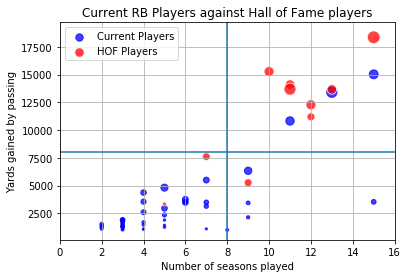

In [143]:
#plot a scatter plot
plt.scatter(current_rb['No of Season'],current_rb['Yds'],s = current_rb['TD'],marker='o',facecolors= 'blue',alpha=0.75, label = 'Current Players')
plt.scatter(hof_rb['No of Season'],hof_rb['Yds'],s = hof_rb['TD'],marker='o',facecolors= 'red',edgecolors="white",alpha=0.75, label = 'HOF Players')
plt.xlim(0,16)
plt.grid()
plt.legend(loc = 'best')
#add title and labels
plt.title("Current RB Players against Hall of Fame players")
plt.xlabel("Number of seasons played")
plt.ylabel("Yards gained by passing")
#add v and h lines 
plt.axvline(x=8)
plt.axhline(y=8000)
# Save the Figure
plt.savefig("Images/rb_scatterplot.png")
#  show the chart
plt.show()

### Wide Receiver Players Data 1989-2019 ### 

In [102]:
#  reading wide receiver players data
wr_file = "Data/NFLWRDATA_Mod.csv"
wide_receiver_data_df = pd.read_csv(wr_file)
# preview dataframe
wide_receiver_data_df.head()

,Rk,Player,From,To,No of Season,Tm,Lg,G,GS,Tgt,Rec,Yds,Y/R,TD,Y/G,Ctch%,Y/Tgt
0,1,Jerry Rice*,1989,2004,16,TOT,NFL,243.0,237.0,1640.0,1285,18014,14.02,148,74.1,NaN,NaN
1,2,Larry Fitzgerald,2004,2019,16,CRD,NFL,238.0,236.0,2190.0,1326,16579,12.50,118,69.7,60.50%,7.57
2,3,Terrell Owens*,1996,2010,15,TOT,NFL,219.0,201.0,1867.0,1078,15934,14.78,153,72.8,57.70%,8.53
3,4,Randy Moss*,1998,2012,15,TOT,NFL,218.0,193.0,1741.0,982,15292,15.57,156,70.1,56.40%,8.78
4,5,Isaac Bruce,1994,2009,16,TOT,NFL,223.0,201.0,1770.0,1024,15208,14.85,91,68.2,57.90%,8.59


In [103]:
#  dropping currunt players from dataframe column
retired_wr =wide_receiver_data_df[wide_receiver_data_df['To']!=2019]
retired_wr.head()

,Rk,Player,From,To,No of Season,Tm,Lg,G,GS,Tgt,Rec,Yds,Y/R,TD,Y/G,Ctch%,Y/Tgt
0,1,Jerry Rice*,1989,2004,16,TOT,NFL,243.0,237.0,1640.0,1285,18014,14.02,148,74.1,NaN,NaN
2,3,Terrell Owens*,1996,2010,15,TOT,NFL,219.0,201.0,1867.0,1078,15934,14.78,153,72.8,57.70%,8.53
3,4,Randy Moss*,1998,2012,15,TOT,NFL,218.0,193.0,1741.0,982,15292,15.57,156,70.1,56.40%,8.78
4,5,Isaac Bruce,1994,2009,16,TOT,NFL,223.0,201.0,1770.0,1024,15208,14.85,91,68.2,57.90%,8.59
5,6,Steve Smith,2001,2016,16,TOT,NFL,219.0,198.0,1748.0,1031,14731,14.29,81,67.3,59.00%,8.43


In [104]:
# finding staderd deviation of wide receiver players
std_wr_value = retired_wr['No of Season'].std()
std_wr_value

print(f'Standard deviation of no. of seasons for WR(s): {std_wr_value}')

Standard deviation of no. of seasons for WR(s): 3.3142336099782237


In [105]:
# finding mean of wide receiver players
mean_wr_value = retired_wr['No of Season'].mean()

print(f'Mean value of no. of seasons for WR(s): {mean_wr_value}')

Mean value of no. of seasons for WR(s): 4.1109540636042405


In [106]:
# finding median of wide receiver players
median_wr_value = retired_wr['No of Season'].median()

print(f'Median value of no. of seasons for WR(s): {median_wr_value}')

Median value of no. of seasons for WR(s): 3.0


In [107]:
# Use numpy to create quartiles
wr_q1 = np.percentile(retired_wr['No of Season'], 25)
wr_q3 = np.percentile(retired_wr['No of Season'],75)

print(f"25th Percentile: {wr_q1}")
print(f"75th Percentile: {wr_q3}")

25th Percentile: 1.0
75th Percentile: 6.0


In [108]:
# Calculate the interquartile range
wr_iqr = (wr_q3 - wr_q1)
print(f"Interquartile range for WR players: {wr_iqr}")

Interquartile range for WR players: 5.0


In [109]:
# Find lower boundary
wr_lower_boundary = wr_q1 - (1.5 * wr_iqr)

print(f"Lower Boundary for WR players: {wr_lower_boundary}")

Lower Boundary for WR players: -6.5


In [110]:
# Find upper boundary
wr_upper_boundary = wr_q3 + (1.5 * wr_iqr)

print(f"Upper Boundary for WR players: {wr_upper_boundary}")

Upper Boundary for WR players: 13.5


In [111]:
# Check for any upper outliers
wr_arr = retired_wr['No of Season']
wr_arr[wr_arr>= wr_upper_boundary]

0      16
2      15
3      15
4      16
5      16
7      14
8      16
9      14
10     14
12     14
14     14
15     14
16     15
18     14
20     16
25     16
29     14
32     14
45     17
61     14
92     15
113    14
123    15
562    17
Name: No of Season, dtype: int64

In [112]:
# Check for any lower outliers
wr_arr[wr_arr<= wr_lower_boundary]

Series([], Name: No of Season, dtype: int64)

In [113]:
# Collecting current WR players from dataframe
all_wr= wide_receiver_data_df[wide_receiver_data_df['To']==2019]
all_wr.count()

# Reducing the dataframe to include only those players with over 1000 yards
current_wr= all_wr[all_wr['Yds']>2500]
current_wr.head()

,Rk,Player,From,To,No of Season,Tm,Lg,G,GS,Tgt,Rec,Yds,Y/R,TD,Y/G,Ctch%,Y/Tgt
1,2,Larry Fitzgerald,2004,2019,16,CRD,NFL,238.0,236.0,2190.0,1326,16579,12.50,118,69.7,60.50%,7.57
21,22,Antonio Brown,2010,2019,10,TOT,NFL,131.0,103.0,1283.0,841,11263,13.39,75,86.0,65.50%,8.78
24,25,Julio Jones,2011,2019,9,ATL,NFL,115.0,114.0,1132.0,721,11048,15.32,55,96.1,63.70%,9.76
28,29,DeSean Jackson,2008,2019,12,TOT,NFL,155.0,148.0,1066.0,597,10415,17.45,55,67.2,56.00%,9.77
40,41,Demaryius Thomas,2010,2019,10,TOT,NFL,133.0,119.0,1130.0,689,9329,13.54,62,70.1,61.00%,8.26


In [114]:
#Reducing the dataframe to include only Hall of Fame Wide Recievers
#find the rows with * in the player name 
hof_wr = wide_receiver_data_df[wide_receiver_data_df['Player'].str.contains('\*')]
hof_wr.head()

,Rk,Player,From,To,No of Season,Tm,Lg,G,GS,Tgt,Rec,Yds,Y/R,TD,Y/G,Ctch%,Y/Tgt
0,1,Jerry Rice*,1989,2004,16,TOT,NFL,243.0,237.0,1640.0,1285,18014,14.02,148,74.1,NaN,NaN
2,3,Terrell Owens*,1996,2010,15,TOT,NFL,219.0,201.0,1867.0,1078,15934,14.78,153,72.8,57.70%,8.53
3,4,Randy Moss*,1998,2012,15,TOT,NFL,218.0,193.0,1741.0,982,15292,15.57,156,70.1,56.40%,8.78
6,7,Marvin Harrison*,1996,2008,13,CLT,NFL,190.0,188.0,1781.0,1102,14580,13.23,128,76.7,61.90%,8.19
8,9,Tim Brown*,1989,2004,16,TOT,NFL,239.0,193.0,1643.0,1051,14209,13.52,95,59.5,NaN,NaN


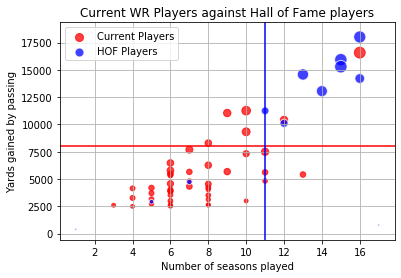

In [144]:
#Creating a scatterplot of the Current WR versus those WR that are now in the Hall of Fame
plt.scatter(current_wr['No of Season'],current_wr['Yds'],s = current_wr['TD'],marker='o',facecolors= 'red',alpha=0.75, label = 'Current Players')
plt.scatter(hof_wr['No of Season'],hof_wr['Yds'],s = hof_wr['TD'],marker='o',facecolors= 'blue',edgecolors="white",alpha=0.75, label = 'HOF Players')

plt.grid()
plt.legend(loc = 'best')
plt.axhline(y=8000, color='r', linestyle='-')
plt.axvline(x=11, color='b', linestyle='-')
#add title and labels
plt.title("Current WR Players against Hall of Fame players")
plt.xlabel("Number of seasons played")
plt.ylabel("Yards gained by passing")
# Save the Figure
plt.savefig("Images/wr_scatterplot.png")
# show the chart
plt.show()

### Tight End players Data 1989 - 2019 ###

In [116]:
#  reading TE players data
te_file = "Data/NFLTEDATA_Mod.csv"
te_data_df = pd.read_csv(te_file)
# preview dataframe
te_data_df.head()

,Rk,Player,From,To,No of Season,Tm,Lg,G,GS,Tgt,Rec,Yds,Y/R,TD,Y/G,Ctch%,Y/Tgt
0,1,Tony Gonzalez*,1997,2013,17,TOT,NFL,270.0,254.0,2012.0,1325,15127,11.42,111,56.0,65.90%,7.52
1,2,Jason Witten,2003,2019,17,DAL,NFL,243.0,233.0,1636.0,1166,12592,10.80,70,51.8,71.30%,7.70
2,3,Antonio Gates,2003,2018,16,SDG,NFL,236.0,190.0,1459.0,955,11841,12.40,116,50.2,65.50%,8.12
3,4,Shannon Sharpe*,1990,2003,14,TOT,NFL,204.0,169.0,1197.0,815,10060,12.34,62,49.3,NaN,NaN
4,5,Greg Olsen,2007,2019,13,TOT,NFL,178.0,152.0,1111.0,684,8073,11.80,59,45.4,61.60%,7.27


In [117]:
#  dropping currunt players from dataframe column
retired_te =te_data_df[te_data_df['To']!=2019]
retired_te.head()

,Rk,Player,From,To,No of Season,Tm,Lg,G,GS,Tgt,Rec,Yds,Y/R,TD,Y/G,Ctch%,Y/Tgt
0,1,Tony Gonzalez*,1997,2013,17,TOT,NFL,270.0,254.0,2012.0,1325,15127,11.42,111,56.0,65.90%,7.52
2,3,Antonio Gates,2003,2018,16,SDG,NFL,236.0,190.0,1459.0,955,11841,12.40,116,50.2,65.50%,8.12
3,4,Shannon Sharpe*,1990,2003,14,TOT,NFL,204.0,169.0,1197.0,815,10060,12.34,62,49.3,NaN,NaN
5,6,Rob Gronkowski,2010,2018,9,NWE,NFL,115.0,100.0,794.0,521,7861,15.09,79,68.4,65.60%,9.90
8,9,Heath Miller,2005,2015,11,PIT,NFL,168.0,167.0,825.0,592,6569,11.10,45,39.1,71.80%,7.96


In [145]:
# finding staderd deviation of TE players
std_te_value = retired_te['No of Season'].std()

print(f'Standard deviation of no. of seasons for TE(s): {std_te_value}')

Standard deviation of no. of seasons for TE(s): 3.429959009395132


In [146]:
# finding mean value of TE players
mean_te_value = retired_te['No of Season'].mean()

print(f'Mean of no. of seasons for TE(s): {mean_te_value}')

Mean of no. of seasons for TE(s): 4.63031914893617


In [147]:
# finding median value of TE players
median_te_value = retired_te['No of Season'].median()

print(f'Median of no. of seasons for TE(s): {median_te_value}')

Median of no. of seasons for TE(s): 4.0


In [148]:
# Use numpy to create quartiles
te_q1 = np.percentile(retired_te['No of Season'], 25)
te_q3 = np.percentile(retired_te['No of Season'],75)

print(f"25th Percentile: {te_q1}")
print(f"75th Percentile: {te_q3}")

25th Percentile: 2.0
75th Percentile: 7.0


In [149]:
# Calculate the interquartile range
te_iqr = (te_q3 - te_q1)
print(f"Interquartile range for TE players: {te_iqr}")

Interquartile range for TE players: 5.0


In [123]:
# Find lower boundary
te_lower_boundary = te_q1 - (1.5 * te_iqr)

print(f"Lower Boundary for TE players: {te_lower_boundary}")

Lower Boundary for TE players: -5.5


In [150]:
# Find upper boundary
te_upper_boundary = te_q3 + (1.5 * te_iqr)

print(f"Upper Boundary for TE players: {te_upper_boundary}")

Upper Boundary for TE players: 14.5


In [151]:
# Check for any upper outliers
te_arr = retired_te['No of Season']
te_arr[te_arr>= te_upper_boundary]

0      17
2      16
10     15
18     15
93     15
116    15
349    17
754    15
787    16
Name: No of Season, dtype: int64

In [152]:
# Check for any lower outliers
te_arr[te_arr<= te_lower_boundary]

Series([], Name: No of Season, dtype: int64)

In [153]:
#  selecting currunt players from dataframe column
all_te =te_data_df[te_data_df['To']==2019]
all_te.head()

current_te = all_te[all_te['Yds']>2000]
current_te.head()


,Rk,Player,From,To,No of Season,Tm,Lg,G,GS,Tgt,Rec,Yds,Y/R,TD,Y/G,Ctch%,Y/Tgt
1,2,Jason Witten,2003,2019,17,DAL,NFL,243.0,233.0,1636.0,1166,12592,10.80,70,51.8,71.30%,7.70
4,5,Greg Olsen,2007,2019,13,TOT,NFL,178.0,152.0,1111.0,684,8073,11.80,59,45.4,61.60%,7.27
6,7,Vernon Davis,2006,2019,14,TOT,NFL,198.0,179.0,928.0,583,7562,12.97,63,38.2,62.80%,8.15
7,8,Jimmy Graham,2010,2019,10,TOT,NFL,141.0,102.0,965.0,620,7527,12.14,73,53.4,64.20%,7.80
12,13,Delanie Walker,2006,2019,14,TOT,NFL,180.0,99.0,782.0,500,5835,11.67,36,32.4,63.90%,7.46


In [135]:
#Reducing the dataframe to include only Hall of Fame Tight Ends
#find the rows with * in the player name 

hof_te = te_data_df[te_data_df['Player'].str.contains('\*')]
hof_te.head()

,Rk,Player,From,To,No of Season,Tm,Lg,G,GS,Tgt,Rec,Yds,Y/R,TD,Y/G,Ctch%,Y/Tgt
0,1,Tony Gonzalez*,1997,2013,17,TOT,NFL,270.0,254.0,2012.0,1325,15127,11.42,111,56.0,65.90%,7.52
3,4,Shannon Sharpe*,1990,2003,14,TOT,NFL,204.0,169.0,1197.0,815,10060,12.34,62,49.3,NaN,NaN
253,254,Ozzie Newsome*,1989,1990,2,CLE,NFL,32.0,28.0,NaN,52,564,10.85,3,17.6,NaN,NaN


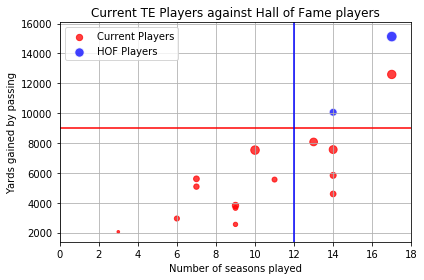

In [155]:
#  dropping Ozzie Newsome from dataframe row due to insufficent data
filtered_hof_te_df =hof_te[hof_te['Rk']!=254]
filtered_hof_te_df.head()

plt.scatter(current_te['No of Season'],current_te['Yds'],s = current_te['TD'],marker='o',facecolors= 'red',alpha=0.75, label = 'Current Players')
plt.scatter(filtered_hof_te_df['No of Season'],filtered_hof_te_df['Yds'],s = filtered_hof_te_df['TD'],marker='o',facecolors= 'blue',edgecolors="white",alpha=0.75, label = 'HOF Players')

plt.axhline(y=9000, color='r', linestyle='-')
plt.axvline(x=12, color='b', linestyle='-')
plt.xlim(0,18)
plt.grid()
plt.legend(loc = 'best')
#add title and labels
plt.title("Current TE Players against Hall of Fame players")
plt.xlabel("Number of seasons played")
plt.ylabel("Yards gained by passing")
plt.tight_layout()
# Save the Figure
plt.savefig("Images/te_scatterplot.png")
#  show the chart
plt.show()

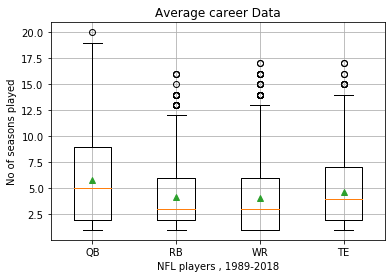

In [156]:
# Create box plot
plt.boxplot([qb_arr, rb_arr,wr_arr,te_arr], showmeans=True)
x = [1,2,3,4]
labels = ['QB', 'RB', 'WR', 'TE']
plt.xticks(x, labels)

plt.grid()
plt.title("Average career Data")
plt.ylabel("No of seasons played")
plt.xlabel("NFL players , 1989-2018")
plt.show()